<a href="https://colab.research.google.com/github/indrap23/PJJDA/blob/main/latihan_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/indrap23/PJJDA/refs/heads/main/marketing_campaign.csv"
df = pd.read_csv(url, sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [12]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [13]:
df = df.dropna(subset=['Income'])

In [14]:
#membuat fitur umur
df['Age'] = 2026 - df['Year_Birth']

/tmp/ipython-input-1289698880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = 2026 - df['Year_Birth']


In [16]:
#membuat fitur total pengeluaran
mnt_cols = [col for col in df.columns if col.startswith('Mnt')]
df['Total_Spent'] = df[mnt_cols].sum(axis=1)

/tmp/ipython-input-3701073664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Spent'] = df[mnt_cols].sum(axis=1)


In [17]:
# Memilih fitur yang akan digunakan untuk clustering
features = ['Age', 'Income', 'Total_Spent']
X = df[features]

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# Standarisasi Fitur
# K-Means sensitif terhadap skala data, sehingga perlu distandarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

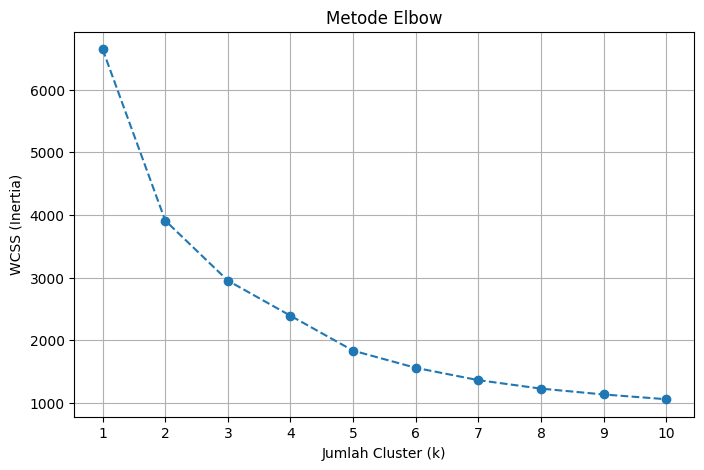

In [24]:
wcss = []
max_k = 10
for i in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Membuat plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

Elbow Method to determine the number of clusters to be formed:


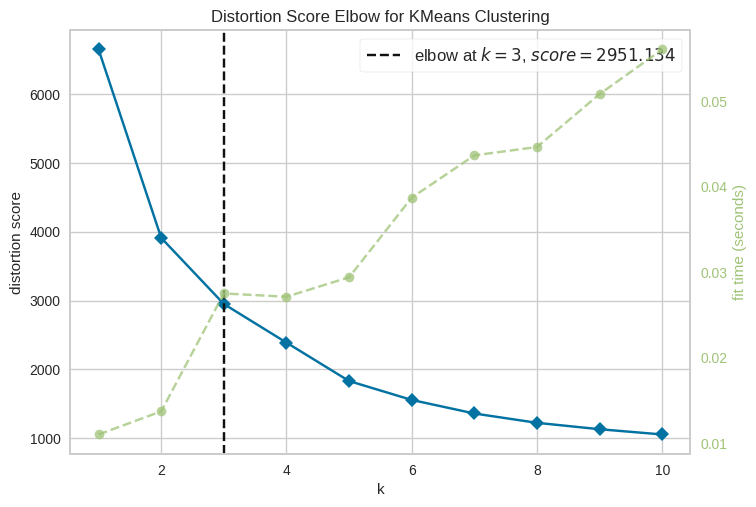

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

print('Elbow Method to determine the number of clusters to be formed:')

# 1. Definisikan model K-Means terlebih dahulu
model = KMeans(random_state=42, n_init=10)

# 2. Masukkan model ke dalam visualizer
Elbow_M = KElbowVisualizer(model, k=(1, 11))

# 3. Fit visualizer menggunakan data yang sudah distandarisasi
Elbow_M.fit(X_scaled)

# 4. Tampilkan plot
Elbow_M.show()

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

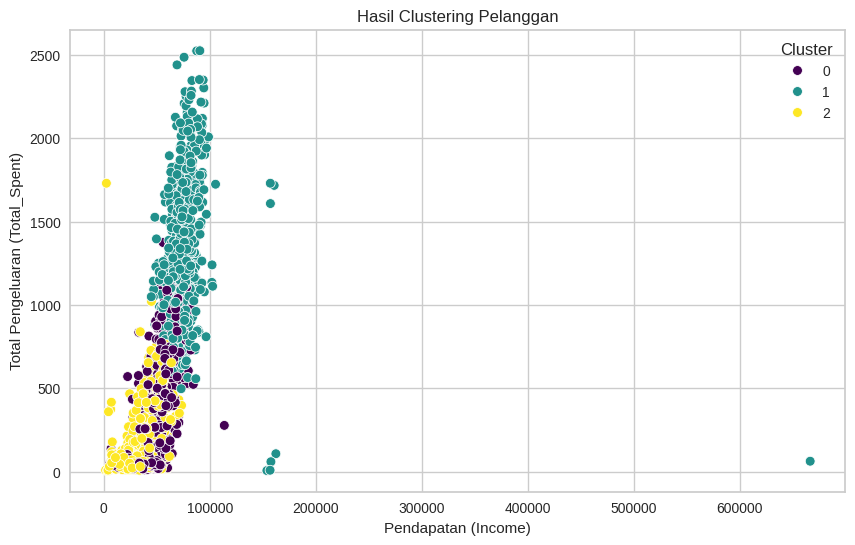

Karakteristik Rata-rata Setiap Cluster:
               Age        Income  Total_Spent
Cluster                                      
0        69.741408  50505.869067   414.770867
1        56.311453  75347.828212  1332.722067
2        49.245219  34838.895388   154.808774


In [29]:
#Visualisasi Hasil
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Total_Spent', hue='Cluster', data=df, palette='viridis', s=50)
plt.title('Hasil Clustering Pelanggan')
plt.xlabel('Pendapatan (Income)')
plt.ylabel('Total Pengeluaran (Total_Spent)')
plt.legend(title='Cluster')
plt.show()

# Menampilkan rata-rata fitur untuk setiap cluster
cluster_summary = df.groupby('Cluster')[features].mean()
print("Karakteristik Rata-rata Setiap Cluster:")
print(cluster_summary)